# Microsoft Corporation "Stock Prediction" using Neural Network

### Sourab M (Roll No - 14CSE1024)

#### Management Assignment 2 - Programming Assignment on one of the important Management topic - "Stock Prices".  Taking 10 years Data (5 Nov, 2007- 4 Nov, 2017) of one of the biggest firms, "Microsoft Corporation", and analyzed it to develop the model - "Assignment of Analyzing a Firm from Management Point of View".

I will be using a Feedforward NeuralNetwork to predict the stock prices of Microsoft Corporation.

In [0]:
from __future__ import print_function, division
import tensorflow as tf
import numpy as np
import csv
import math
import matplotlib.pyplot as plt
import os
import time
import datetime

In [3]:
print(tf.__version__)
print(np.__version__)

1.12.0
1.14.6


In [5]:
with open('msft(2).csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    data = list(readCSV)
    dates = []
    opening_stock_prices = []
    high_sp = []
    low_sp=[]
    closing_stock_prices = []
    volume = []
    
    for i in range(len(data)):
        if i>=1:
            #inputs taken by the model
            dates.append(data[i][0])
            opening_stock_prices.append(float(data[i][1]))
            high_sp.append(float(data[i][2]))
            low_sp.append(float(data[i][3]))
            volume.append(float(data[i][5]))
            #output to be predicted 
            closing_stock_prices.append(float(data[i][4]))
            
    dates.reverse()
    opening_stock_prices.reverse()
    high_sp.reverse() 
    low_sp.reverse()  
    volume.reverse()   
    closing_stock_prices.reverse() 
    
    print("Date\tOpening_stock_price\tHigh_sp\tLow_sp\tVolume\tClosing_stock_price")
    for i in range(10):
       print(dates[i],"\t",opening_stock_prices[i],"\t\t",high_sp[i],"\t",low_sp[i],"\t",volume[i],"\t",closing_stock_prices[i])
    
    osp=np.array(opening_stock_prices)
    osp_2 = np.array(np.power(osp, 2))
    osp_3 = np.array(np.power(osp, 3))
    csp=np.array(closing_stock_prices)
   
    hsp=np.array(high_sp)
    hsp_2 = np.array(np.power(hsp, 2))
    hsp_3 = np.array(np.power(hsp, 3))
    
    lsp=np.array(low_sp)
    lsp_2 = np.array(np.power(lsp, 2))
    lsp_3 = np.array(np.power(lsp, 3))
    
    v=np.array(volume)
    #n_dates = (dates - np.mean(dates))/np.std(dates)
    #print(osp-np.mean(osp))
     
    n_open_sp = (osp - np.mean(osp))/np.std(osp)
    n_open_sp2 = (osp_2 - np.mean(osp_2))/np.std(osp_2)
    n_open_sp3 = (osp_3 - np.mean(osp_3))/np.std(osp_3)
    n_high_sp = (hsp - np.mean(hsp))/np.std(hsp)
    n_high_sp2 = (hsp_2 - np.mean(hsp_2))/np.std(hsp_2)
    n_high_sp3 = (hsp_3 - np.mean(hsp_3))/np.std(hsp_3)
    n_low_sp = (lsp -np.mean(lsp))/np.std(lsp)
    n_low_sp2 = (lsp_2 - np.mean(lsp_2))/np.std(lsp_2)
    n_low_sp3 = (lsp_3 - np.mean(lsp_3))/np.std(lsp_3)
    n_volume = (v - np.mean(v))/np.std(v)
    n_close_sp = (csp - np.mean(csp))/np.std(csp)
    
    
    """print()
    print("Date\tOpening_stock_price\tHigh_sp\tLow_sp\tVolume\tClosing_stock_price")
    for i in range(10):
       print(dates[i],n_open_sp[i],n_high_sp[i],n_low_sp[i],n_volume[i],n_close_sp[i])"""
    
    plt.plot(csp)
    plt.xlabel("10 year period from 2007-2017")
    plt.ylabel("Closing Stock Price")
    plt.show()
    
    sp_data=[]
    for i in range(len(osp)):
        sp_data.append([n_open_sp[i],n_open_sp2[i],n_high_sp[i],n_low_sp[i],n_volume[i]])
        #sp_data.append([osp[i],hsp[i],lsp[i]])
    """for i in range(10):
        print(sp_data[i])"""
    
    sp_x = np.array(sp_data)
    #print()
    #print(sp_x.shape, sp_x.ndim)
    
    sp_y = np.array(csp)
    #print(sp_y.shape, sp_y.ndim) 
    
    random_indices = np.random.permutation(sp_x.shape[0])
    sp_x_random = []
    sp_y_random = []
    for i in range(sp_x.shape[0]):
        sp_x_random.append(sp_x[i, :])
        sp_y_random.append(sp_y[i])
        
    sp_x_random = np.array(sp_x_random)
    sp_y_random = np.array(sp_y_random)
    
    sp_x_train = sp_x_random[:int(0.6*sp_x.shape[0]),:]
    sp_x_valid = sp_x_random[int(0.6*sp_x.shape[0]):int(0.6*sp_x.shape[0])+int(0.2*sp_x.shape[0]),:]
    sp_x_test = sp_x_random[int(0.6*sp_x.shape[0])+int(0.2*sp_x.shape[0]):,:]
    sp_y_train = sp_y_random[:int(0.6*sp_x.shape[0])]
    sp_y_valid = sp_y_random[int(0.6*sp_x.shape[0]):int(0.6*sp_x.shape[0])+int(0.2*sp_x.shape[0])]
    sp_y_test = sp_y_random[int(0.6*sp_x.shape[0])+int(0.2*sp_x.shape[0]):]
    
    train_size = sp_x_train.shape[0]
    train_size = sp_x_valid.shape[0]
    test_size = sp_x_test.shape[0]
    #print(sp_x_train.dtype)
    #print(sp_x_train.shape, sp_y_train.shape)
    #print(sp_x_valid.shape, sp_y_valid.shape)
    #print(sp_x_test.shape, sp_y_test.shape)
    
    
    
        
       

FileNotFoundError: ignored

## Implementing FeedForward Neural Network Model to the data

Writing to /home/sourab/Desktop/MGT_assignment/runs/1510216430

Epoch: 0001 cost=134.713208008
Epoch: 0051 cost=0.040591362
Epoch: 0101 cost=0.010456086
Epoch: 0151 cost=0.010175025
Epoch: 0201 cost=0.010147455
Epoch: 0251 cost=0.010134067
Epoch: 0301 cost=0.010128439
Epoch: 0351 cost=0.010129434
Epoch: 0401 cost=0.010135950
Epoch: 0451 cost=0.010147133
Epoch: 0501 cost=0.010162111
Epoch: 0551 cost=0.010180103
Epoch: 0601 cost=0.010200365
Epoch: 0651 cost=0.010222147
Epoch: 0701 cost=0.010244969
Epoch: 0751 cost=0.010268123
Epoch: 0801 cost=0.010291213
Epoch: 0851 cost=0.010313629
Epoch: 0901 cost=0.010335033
Epoch: 0951 cost=0.010355053
Saved model checkpoint to /home/sourab/Desktop/MGT_assignment/runs/1510216430/checkpoints/model

Optimization Finished!
The loss on the test data = 0.248062
Predicted_Stock_Price	True_Stock_Price
[ 83.32792046] 	 84.14
[ 83.15534287] 	 84.05
[ 82.67230299] 	 83.18
[ 83.08187864] 	 83.18
[ 83.058847] 	 83.89
[ 84.23221427] 	 83.81
[ 78.48656699] 	 78.76

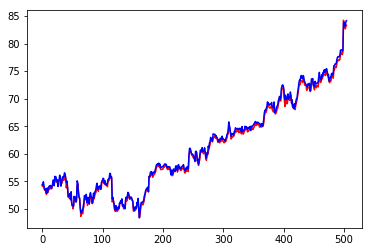

In [0]:
tf.reset_default_graph()



# Parameters
learning_rate = 0.179
training_epochs = 1000
batch_size = 100
display_step = 50

# Network Parameters
#n_hidden_1 = 1024 # 1st layer number of neurons
#n_hidden_2 = 1024 # 2nd layer number of neurons
n_input = 5
n_classes = 1 

# tf Graph input
X = tf.placeholder("float64", [None, n_input], name="input_x")
Y = tf.placeholder("float64", [None, n_classes], name="input_y")


# Store layers weight & bias
weights = {
    #'h1': tf.Variable(np.random.rand(n_input, n_hidden_1), dtype=tf.float64),
    #'h2': tf.Variable(np.random.rand(n_hidden_1, n_hidden_2), dtype=tf.float64),
    'out': tf.Variable(np.random.rand(n_input, n_classes), dtype=tf.float64, name="w")
}
biases = {
    #'b1': tf.Variable(np.random.rand(n_hidden_1), dtype=tf.float64),
    #'b2': tf.Variable(np.random.rand(n_hidden_2), dtype=tf.float64),
    'out': tf.Variable(np.random.rand(n_classes), dtype=tf.float64, name="b")
}

# Create model
def mlffnn(x):
    # Hidden fully connected layer with 1024 neurons
    #layer_1 = tf.sigmoid(tf.add(tf.matmul(x, weights['h1']), biases['b1']))
    # Hidden fully connected layer with 1024 neurons
    #layer_2 = tf.sigmoid(tf.add(tf.matmul(layer_1, weights['h2']), biases['b2']))
    # Output fully connected layer with a neuron for each class
    out_layer = tf.add(tf.matmul(x, weights['out']),biases['out'], name="predictions")
    return out_layer

# Construct model
logits = mlffnn(X)


# Define loss and optimizer
loss_op = tf.reduce_mean(tf.losses.mean_squared_error(predictions=logits, labels=Y), name="loss")
optimizer =  tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

def nextbatch(i):
    #returns next batch
    batch_X = sp_x_train[(batch_size*i):(batch_size*(i+1)),:]
    batch_Y = sp_y_train[(batch_size*i):(batch_size*(i+1))]
    return(batch_X,batch_Y)

# Output directory for models and summaries
timestamp = str(int(time.time()))
out_dir = os.path.abspath(os.path.join(os.path.curdir, "runs", timestamp))
print("Writing to {}\n".format(out_dir))

# Checkpoint directory. Tensorflow assumes this directory already exists so we need to create it
checkpoint_dir = os.path.abspath(os.path.join(out_dir, "checkpoints"))
checkpoint_prefix = os.path.join(checkpoint_dir, "model")
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)
saver = tf.train.Saver(tf.global_variables(), max_to_keep=1)


# Initializing the variables
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0
        num_batches = train_size//batch_size
        
        # Loop over all batches
        for i in range(num_batches):
            (batch_X,batch_Y) = nextbatch(i)
            
            # Run optimization op (backprop) and cost op (to get loss value)
            _, cost = sess.run([train_op, loss_op], feed_dict={X: batch_X,Y: batch_Y.reshape(-1,1)})
    
        # Compute average loss
        avg_cost += cost / num_batches
        # Display logs per epoch step
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost={:.9f}".format(avg_cost))
     
    path = saver.save(sess, checkpoint_prefix)
    print("Saved model checkpoint to {}\n".format(path))
    print("Optimization Finished!")
    
    # Testing phase
    logits, cost = sess.run([logits, loss_op], feed_dict={X: sp_x_test,Y: sp_y_test.reshape(-1,1)})
    
    print("The loss on the test data =",cost)
    print("Predicted_Stock_Price\tTrue_Stock_Price")
    for i in range(10):
        print(logits[-(i+1)],"\t",sp_y_test[-(i+1)])
        

    plt.plot(logits,'r',sp_y_test,'b')
    plt.show()

In [0]:

print("Date\tOpening_stock_price\tHigh_sp\tLow_sp\t Volume\t\tClosing_stock_price\tPredicted_Closing_Stock_by_FNN")
for i in range(20):
        print(dates[-(i+1)],"\t",opening_stock_prices[-(i+1)],"\t\t",high_sp[-(i+1)],"\t",low_sp[-(i+1)],"\t",volume[-(i+1)],"\t",closing_stock_prices[-(i+1)],"\t\t\t",logits[-(i+1)])

Date	Opening_stock_price	High_sp	Low_sp	 Volume		Closing_stock_price	Predicted_Closing_Stock_by_FNN
3-Nov-17 	 84.08 		 84.54 	 83.4 	 17633543.0 	 84.14 			 [ 83.32792046]
2-Nov-17 	 83.35 		 84.46 	 83.12 	 23992945.0 	 84.05 			 [ 83.15534287]
1-Nov-17 	 83.68 		 83.76 	 82.88 	 22307371.0 	 83.18 			 [ 82.67230299]
31-Oct-17 	 84.36 		 84.36 	 83.11 	 27086575.0 	 83.18 			 [ 83.08187864]
30-Oct-17 	 83.7 		 84.32 	 83.1 	 31756653.0 	 83.89 			 [ 83.058847]
27-Oct-17 	 84.37 		 86.2 	 83.61 	 71066729.0 	 83.81 			 [ 84.23221427]
26-Oct-17 	 79.2 		 79.42 	 78.75 	 32120717.0 	 78.76 			 [ 78.48656699]
25-Oct-17 	 78.58 		 79.1 	 78.01 	 20410808.0 	 78.63 			 [ 77.9904725]
24-Oct-17 	 78.9 		 79.2 	 78.46 	 17517182.0 	 78.86 			 [ 78.2549767]
23-Oct-17 	 78.99 		 79.34 	 78.76 	 20627173.0 	 78.83 			 [ 78.46531595]
20-Oct-17 	 78.32 		 78.97 	 78.22 	 22866426.0 	 78.81 			 [ 78.02137245]
19-Oct-17 	 77.57 		 77.93 	 77.35 	 15092758.0 	 77.91 			 [ 77.08248117]
18-Oct-17 	 77.

Above, you can see the 'Dates', 'Opening Stock Price', 'Range(High & Low)', 'Volume', 'Closing Stock Price' and 'Predicted closing Stock Price' of Microsoft Corporation for the past 20 days(9th oct,2017 - 3rd Nov,2017). It can been clearly seen that Predicted and Actual Closing Stock Prices are pretty much the same. The Neural Network Model developed here successfully does the prediction of Stock Prices. The Model takes 'Opening Stock Price', 'Range(High & Low)' and 'Volume' as input, to compute the output, i.e, 'Closing Stock Price'.

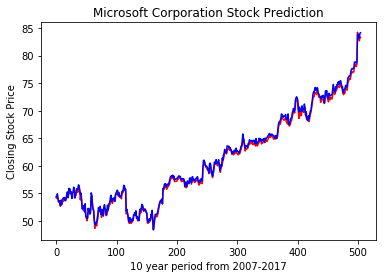

In [0]:
plt.plot(logits,'r',sp_y_test,'b')
plt.xlabel("10 year period from 2007-2017")
plt.ylabel("Closing Stock Price")
plt.title("Microsoft Corporation Stock Prediction")
plt.show()

In the above graph, the "Red" line represents the "Predicted stock Price" and "Blue" line represents the "Actual Stock Price". Predicted values are almost same as Actual Values. So, I have successfully developed a Stock Prediction Model for Microsoft Corporation using the data of past 10 years from Nov 5,2007 to Nov 4,2017. 

### As part of Management Assignment, I have done the "Programming Assignment" related to the interesting and important aspect of Management. I have also taken data of one of the biggest corporations in the world, i.e., Microsoft Corporation, and analyzed it to develop my model, thereby also doing  the assignment of "Analyzing a Firm from the Management point of view".

In [0]:
checkpoint_file = tf.train.latest_checkpoint("/home/sourab/Desktop/MGT_assignment/runs/1510216430/checkpoints")
graph = tf.Graph()
with graph.as_default():
    sess = tf.Session()
    with sess.as_default():
        # Load the saved meta graph and restore variables
        saver = tf.train.import_meta_graph("{}.meta".format(checkpoint_file))
        saver.restore(sess, checkpoint_file)

        # Get the placeholders from the graph by name
        input_x = graph.get_operation_by_name("input_x").outputs[0]
        # input_y = graph.get_operation_by_name("input_y").outputs[0]
       
        # Tensors we want to evaluate
        predictions = graph.get_operation_by_name("predictions").outputs[0]


        open_sp = 84.14
        open_sp2 = open_sp**2
        high_sp = 84.61
        low_sp = 83.83
        volume = 19400000 

        n_osp = (open_sp-np.mean(osp))/np.std(osp)
        n_osp2= (open_sp2-np.mean(osp_2))/np.std(osp_2)
        n_hsp = (high_sp-np.mean(hsp))/np.std(hsp)
        n_lsp = (low_sp-np.mean(lsp))/np.std(lsp)
        n_v = (volume-np.mean(v))/np.std(v)

        todays_input = [n_osp, n_osp2, n_hsp, n_lsp, n_v]
        todays_input = np.array(todays_input)

        print(todays_input)

        logits = sess.run(predictions, feed_dict={input_x: todays_input.reshape(1, -1)})

        print("Today's closing stock price predicted: ", logits[0])

INFO:tensorflow:Restoring parameters from /home/sourab/Desktop/MGT_assignment/runs/1510216430/checkpoints/model
[ 3.2419685   4.19201627  3.23883985  3.25534662 -1.04148947]
Today's closing stock price predicted:  [ 83.5647104]
